<a href="https://colab.research.google.com/github/Yug25/DELHI-peek-power-DEmand-prediction/blob/main/powerdemand_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



# Machine Learning Model for Predicting Electricity PEEK_Power Demand in Delhi

## Objective:
This document outlines the process of building a machine learning model to predict electricity **peak power demand** in Delhi.

### 1. Data Loading:
All the data used is legitimate. The data for **peak power demand** is retrieved from government websites, and the weather data is sourced from trusted websites. The dataset was created with extensive research, as it is well known that half of a machine learning project's success depends on selecting the correct features.

The dataset is first loaded into a DataFrame named `df_final`.

### 2. Feature Selection and Deletion:
Some columns in the dataset are irrelevant to the prediction task and are removed to streamline the model. The columns that were deleted include general information like station details, visibility, solar radiation, etc.

The columns removed are: `'name', 'datetime', 'dew', 'snow', 'snowdepth', 'windgust', 'winddir', 'cloudcover', 'visibility', 'solarradiation', 'solarenergy', 'uvindex', 'severerisk', 'sunrise', 'moonphase', 'sunset', 'description', 'icon', 'stations'`.

**Selected Features**:

`DATE, POWER_DEMAND, tempmax, tempmin, temp, feelslikemax, feelslikemin, feelslike, humidity, precip, precipprob, precipcover, preciptype, windspeed, sealevelpressure, conditions`


### 3. Data Visualization:
To better understand the distribution and relationships in the data, we create visualizations like histograms and scatter plots. This helps analyze the distribution of variables and identify potential correlations between features and electricity demand.

### 4. Adding Holiday and Weekend Features:
Public holidays and weekends are important factors in predicting electricity demand. We add two new features to the dataset:

- `is_holiday`: Indicates whether the day is a public holiday in Delhi, based on a predefined list of holidays from 2013 to 2024.
- `is_weekend`: A binary indicator for whether the day falls on a weekend (Saturday or Sunday).

This helps the model account for patterns in electricity demand based on holidays and weekends.

### 5. Handling Missing and Zero Values:
- Missing values in weather-related columns are filled using an average value based on neighboring rows to maintain data consistency.
- For the `POWER_DEMAND` column, zero values are replaced by the average of the values from the previous three rows and the next three rows to smooth out anomalies.

### 6. Rain Feature Creation:
A new column, `rain`, is added based on the `precipitation` column. If there is precipitation, the value is set to 1 (indicating rain). If the `precipitation` column is null, the value is set to 0. After this transformation, the `precipitation` column is removed, as the rain information is already captured.





### Model Enhancement

#### 4. Feature Engineering: Interaction and Lagged Features

To further capture the temporal patterns and complex interactions in the dataset, additional features were engineered based on temperature-humidity interactions and lagged rolling averages of key variables.

**Interaction Features**:
- Interaction features between temperature variables and humidity were introduced to model the combined effect of these two important weather parameters on power demand.
  
  **Example Interaction Features**:
  - `tempmax_humidity`: The product of maximum temperature (`tempmax`) and humidity.
  - `feelslike_humidity`: The product of perceived temperature (`feelslike`) and humidity.

These interaction terms allow the model to account for how humidity amplifies or dampens the effect of temperature on electricity demand. For instance, high humidity combined with high temperature might increase cooling demand, while lower humidity could have a less pronounced effect.

**Lagged Features**:
- Lagged features were created to capture historical trends in both weather variables and electricity demand. Specifically, rolling averages were computed over 3-day and 7-day windows, which help smooth out day-to-day variations and capture longer-term patterns.

  **Example Lagged Features**:
  - `tempmax_rolling_3day`: The 3-day rolling average of maximum temperature.
  - `humidity_rolling_7day`: The 7-day rolling average of humidity.
  - `POWER_DEMAND_rolling_3day`: The 3-day rolling average of electricity demand.

  These lagged features are useful in time series forecasting, where past patterns often influence future demand. For instance, a persistently high temperature over several days could lead to increased power demand for cooling.

#### 5. Incorporating Polynomial Regression for Non-Linear Patterns

As observed from the scatter plots, certain features, such as `tempmax`, exhibit a non-linear relationship with `POWER_DEMAND`. To capture this non-linearity, a second-degree polynomial regression model was fitted for `tempmax`. This polynomial regression curve was added to the scatter plot to visualize the non-linear relationship.

**Why Polynomial Regression?**
- A linear model might not adequately capture the relationship between temperature and power demand, especially when the relationship is curved or exhibits quadratic trends. By introducing polynomial terms, the model can better fit the data and improve predictive accuracy.

  **Example**:
  - For the `tempmax` feature, a degree-2 polynomial regression curve was fitted and plotted, showing that electricity demand rises at a certain temperature threshold but flattens or even decreases at higher extremes.

#### 6. Summary of Feature Engineering

In this enhanced model, we’ve introduced several new features and techniques to better capture the underlying patterns between weather and power demand:

- **Interaction Features**: Created between temperature and humidity to account for their combined effect on electricity consumption.
- **Lagged Features**: Rolling averages of key weather and demand variables were generated to incorporate past data trends into the model.
- **Polynomial Regression**: Applied to temperature variables to better capture non-linear relationships with power demand.

These additional features and techniques provide the model with richer information to improve its predictive power, especially for highly fluctuating variables like weather and power demand.










### : Creating New Features and Analyzing Feature Relevance

#### 7. Creating Features Related to Temperature Ranges

To explore the effect of temperature variability on power demand, a new feature, `temp_range`, was created to represent the range of temperature between daily maximum and minimum values. This is useful because:
- **Temperature Variability**: A larger difference between maximum and minimum temperatures (i.e., a higher `temp_range`) can indicate more extreme weather conditions, which may influence electricity consumption patterns, especially related to heating or cooling demand.

  ```python
  df1['temp_range'] = df1['tempmax'] - df1['tempmin']
  ```

  **Why This Feature?**  
  Temperature variability during the day can significantly impact electricity demand. A higher temperature range may lead to a higher cooling load during the day and a potential heating load at night, increasing the overall demand for electricity.

#### 8. Exploring Combined Temperature-Humidity Variables (Heat Index)

Another critical weather-related factor is the **discomfort** people feel due to high temperature combined with humidity. To account for this, a new feature called `heat_index` was calculated using Steadman’s formula. The **heat index** is a measure of how hot it feels when humidity is factored into the actual air temperature.

- **Why Calculate the Heat Index?**  
  The combined effect of temperature and humidity can significantly impact power demand, particularly for cooling systems. High humidity with high temperature often leads to greater electricity use for air conditioning.

##### Formula Explanation: Steadman's Heat Index

The Steadman’s formula used in the code is an approximation that calculates the **heat index** based on air temperature and humidity. Here’s the breakdown of the formula:

- The constants (`c1` to `c9`) are part of the empirically derived formula.
- `T` refers to the temperature in Celsius, and `RH` refers to relative humidity in percentage.
- The terms `T^2`, `RH^2`, and interactions between temperature and humidity (`T * RH`) help capture the nonlinear effect of both factors.

  **Code Implementation**:
  ```python
  def calculate_heat_index(temp, humidity):
      """Calculates the heat index based on temperature and humidity."""
      c1 = -42.379
      c2 = 2.04901523
      c3 = 10.14333127
      c4 = -0.22475541
      c5 = -6.83783 * 10**-3
      c6 = -5.481717 * 10**-2
      c7 = 1.22874 * 10**-3
      c8 = 8.5282 * 10**-4
      c9 = -1.99 * 10**-6

      T = temp  # Temperature in Celsius
      RH = humidity  # Relative humidity in percentage

      heat_index = c1 + c2*T + c3*RH + c4*T*RH + c5*T**2 + c6*RH**2 + c7*T**2*RH + c8*T*RH**2 + c9*T**2*RH**2
      return heat_index

  # Calculate Heat Index and add it as a new feature
  df1['heat_index'] = df1.apply(lambda row: calculate_heat_index(row['temp'], row['humidity']), axis=1)
  ```

  **Why This Feature?**  
  The **heat index** is a practical way to model the actual discomfort felt by people, which is likely to drive their electricity consumption patterns, particularly when temperatures feel much hotter due to high humidity. Capturing this combined effect in a single feature can significantly improve predictive power.

#### 9. Analyzing and Selecting the Most Relevant Features

Once the feature engineering is complete, it's important to analyze the relevance of the newly created features. This is achieved by calculating a **correlation matrix** that measures the linear relationship between all features and the target variable, `POWER_DEMAND`.

##### Correlation Analysis:
- **Correlation Matrix**: A heatmap of correlations is generated to visualize the strength of relationships between the target variable and all other features, as well as inter-feature relationships.
- **Threshold for Feature Selection**: Features with a correlation greater than an absolute threshold of `0.2` with `POWER_DEMAND` are selected as relevant features for further analysis or model development.

  **Code Implementation**:
  ```python
  # Calculate the correlation matrix
  correlation_matrix = df1.select_dtypes(include=['number']).corr()

  # Create a heatmap of the correlation matrix
  plt.figure(figsize=(18, 15))  # Adjust figure size as needed
  sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
  plt.title('Correlation Matrix of Features')
  plt.savefig('correlation_matrix.png')

  # Select relevant features based on correlation (example threshold)
  correlation_threshold = 0.2
  relevant_features = correlation_matrix[abs(correlation_matrix['POWER_DEMAND']) > correlation_threshold]['POWER_DEMAND'].index.tolist()

  print(f"Selected Features based on Correlation (threshold > {correlation_threshold}): {relevant_features}")
  ```

##### Key Points on Correlation Analysis:
- **Why Calculate the Correlation Matrix?**  
  Correlation helps identify the strength and direction of the linear relationships between features and the target variable. Features with high positive or negative correlation with `POWER_DEMAND` are more likely to be useful for predictive modeling.
  
- **Why Use a Threshold?**  
  By applying a correlation threshold (e.g., 0.2), you focus on the most impactful features, excluding those that have little to no linear relationship with the target variable. This simplifies the model and may improve performance.

  **Selected Features**:
  The output from the correlation analysis provides a list of the most relevant features based on the defined threshold. These features will likely have the strongest relationship with `POWER_DEMAND` and be important for forecasting electricity demand in Delhi.

---



To continue the documentation based on the process outlined so far, here is a detailed summary of the steps taken to train different models for predicting power demand and their subsequent evaluation:

---

### **Model Training and Evaluation for Power Demand Prediction**

#### 1. **Initial Data Preparation**
   - A dataset containing weather-related features (`tempmax`, `tempmin`, `humidity`, etc.) and historical power demand values (including rolling averages) was used.
   - Target variable: `POWER_DEMAND`.
   - Features included were selected based on a preliminary feature analysis, ensuring that relevant predictors like temperature, humidity, and previous power demand trends were incorporated.

#### 2. **Baseline Linear Regression Model**
   - A baseline linear regression model was trained to establish a performance benchmark.
   - Data was split into training and testing sets, ensuring the model would be evaluated on unseen data.
   - Missing values were imputed using mean-based imputation.
   - The model's performance was evaluated using metrics such as Mean Squared Error (MSE), Root Mean Squared Error (RMSE), and R-squared, with the linear regression providing a good starting point for model comparison.

#### 3. **Random Forest Model**
   - Following the linear regression, a more complex Random Forest model was trained.
   - This model, using the same features and target variable, was intended to capture more complex, non-linear relationships between the predictors and the target.
   - The performance of the Random Forest model was superior to that of the linear regression, especially in terms of lower MSE and higher R-squared values, making it the best-performing model at this stage.

#### 4. **XGBoost Model**
   - Additionally, an XGBoost model was trained for comparison.
   - Although XGBoost performed similarly to Random Forest, it did not significantly outperform the latter, and the Random Forest remained the top choice based on the evaluation metrics.

#### 5. **Hyperparameter Tuning for Random Forest**
   - A hyperparameter tuning process was conducted for the Random Forest model to further optimize its performance.
   - Using grid search with cross-validation, the optimal combination of parameters such as the number of estimators, maximum tree depth, and leaf size were found.
   - After tuning, the improved Random Forest model showed slightly better performance but did not drastically outperform the untuned version.

#### 6. **Model Comparison and Performance**
   - The results from all models were compared, with the following key metrics observed:
     - **Linear Regression**: While a strong baseline, it had the highest MSE and RMSE.
     - **Random Forest**: Outperformed both the linear regression and XGBoost, with lower MSE and higher R-squared.
     - **XGBoost**: Performed closely to the Random Forest but did not surpass it.

   - After model comparison, the Random Forest model, particularly the hyperparameter-tuned version, was selected as the final best-performing model for power demand prediction.

#### 7. **Visualization of Model Performance**
   - The performance of the selected models was visualized through multiple plots:
     - A bar chart comparing actual vs predicted power demand for the best model over a set number of data points.
     - A line plot comparing actual and predicted values for better visual clarity on how the model performed across different demand levels.
   - The visualizations showed that while the model closely tracked the actual power demand, there were occasional deviations, especially for outlier values. Still, the overall trend was well captured.

#### 8. **Saving the Best Model**
   - The hyperparameter-tuned Random Forest model, deemed the best performer, was saved for future use.
   - This model is now ready for deployment or further analysis, allowing predictions to be made on new data points without retraining.

---

### **Conclusion**

In this documentation, we demonstrated the process of building and evaluating multiple machine learning models for predicting power demand. The Random Forest model, especially after hyperparameter tuning, emerged as the best model for this task. It provided the most accurate predictions with the lowest error rates compared to linear regression and XGBoost models.

This process highlights the importance of not only selecting the right model but also tuning hyperparameters to achieve optimal performance. By saving the best model, it can be easily deployed or integrated into a larger system for real-time predictions of electricity demand based on weather conditions and historical trends.



In [ ]:
import pandas as pd

In [ ]:
import pandas as pd
df_final=pd.read_csv("/content/df_fff (2).csv")

############modeling


In [ ]:
# List of columns to delete
columns_to_delete = ['name', 'datetime', 'dew', 'snow', 'snowdepth', 'windgust', 'winddir', 'cloudcover',
                     'visibility', 'solarradiation', 'solarenergy', 'uvindex', 'severerisk', 'sunrise',
                     'moonphase', 'sunset', 'description', 'icon', 'stations']

# Dropping the columns from df_final
df1 = df_final.drop(columns=columns_to_delete)

# Display the modified DataFrame
df1


,DATE,POWER_DEMAND,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,humidity,precip,precipprob,precipcover,preciptype,windspeed,sealevelpressure,conditions
0,2013-04-14,3153.0,37.7,23.1,28.7,35.4,23.1,28.1,39.7,2.0,100,4.17,rain,22.3,1008.3,"Rain, Partially cloudy"
1,2013-04-15,3180.0,37.5,21.1,28.6,35.3,21.1,28.0,41.7,0.0,0,0.00,NaN,17.6,1005.1,Clear
2,2013-04-16,3558.0,40.1,21.9,31.7,37.5,21.9,30.4,30.7,0.0,0,0.00,NaN,27.7,1001.7,Partially cloudy
3,2013-04-17,3646.0,36.4,21.0,29.9,34.0,21.0,28.5,27.4,0.0,0,0.00,NaN,22.3,1002.5,Clear
4,2013-04-18,3658.0,37.5,21.7,30.6,35.2,21.7,29.2,23.7,0.0,0,0.00,NaN,12.4,1003.4,Clear
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2054,2024-09-14,4683.0,31.0,23.0,26.5,37.6,23.0,29.1,87.5,1.0,100,8.33,rain,16.6,1003.5,"Rain, Partially cloudy"
2055,2024-09-15,4630.0,32.0,25.0,28.0,36.7,25.0,31.2,81.8,0.2,100,4.17,rain,20.5,1004.3,"Rain, Partially cloudy"
2056,2024-09-16,5000.0,32.0,26.0,28.8,37.8,26.0,32.2,77.8,0.0,0,0.00,NaN,20.5,1005.8,Partially cloudy
2057,2024-09-17,5490.0,33.0,26.0,29.0,38.0,26.0,33.0,78.1,0.0,0,0.00,NaN,13.0,1007.3,Partially cloudy


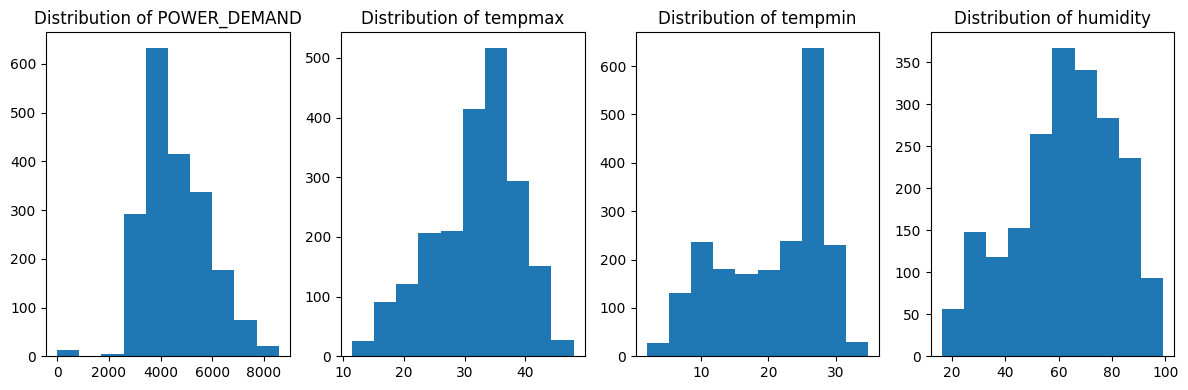

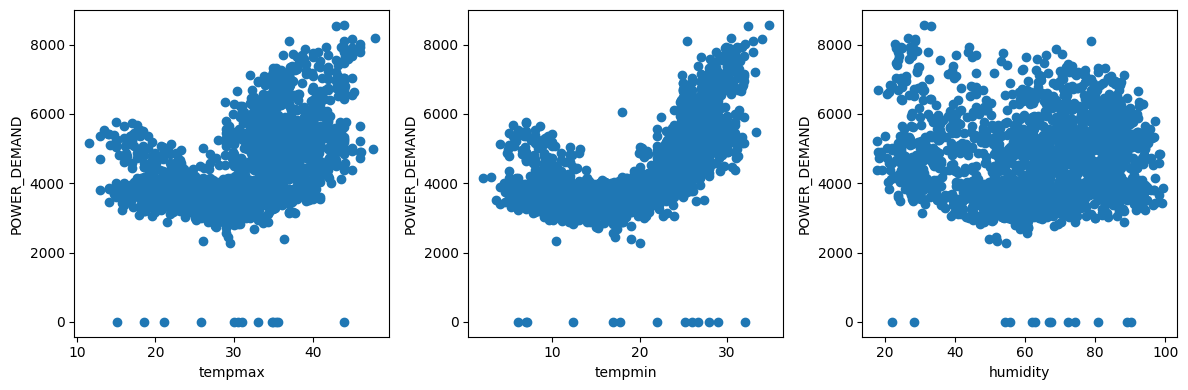

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histograms
plt.figure(figsize=(12, 4))
plt.subplot(1, 4, 1)
plt.hist(df1['POWER_DEMAND'])
plt.title('Distribution of POWER_DEMAND')

plt.subplot(1, 4, 2)
plt.hist(df1['tempmax'])
plt.title('Distribution of tempmax')

plt.subplot(1, 4, 3)
plt.hist(df1['tempmin'])
plt.title('Distribution of tempmin')

plt.subplot(1, 4, 4)
plt.hist(df1['humidity'])
plt.title('Distribution of humidity')
plt.tight_layout()
plt.savefig('histograms.png')

# Scatter plots
plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
plt.scatter(df1['tempmax'], df1['POWER_DEMAND'])
plt.xlabel('tempmax')
plt.ylabel('POWER_DEMAND')

plt.subplot(1, 3, 2)
plt.scatter(df1['tempmin'], df1['POWER_DEMAND'])
plt.xlabel('tempmin')
plt.ylabel('POWER_DEMAND')

plt.subplot(1, 3, 3)
plt.scatter(df1['humidity'], df1['POWER_DEMAND'])
plt.xlabel('humidity')
plt.ylabel('POWER_DEMAND')
plt.tight_layout()
plt.savefig('scatter_plots.png')

In [ ]:

# Intermediate Step 1.2.1 : Incorporate holiday and weekend information into the dataset.
import pandas as pd
from datetime import datetime

# List of public holidays in Delhi (replace with actual holidays for 2022-2024)

holidays_2022 = ['2022-01-26', '2022-03-01', '2022-03-18', '2022-04-14', '2022-04-15', '2022-05-03', '2022-08-09', '2022-08-15', '2022-10-02', '2022-10-05', '2022-10-24', '2022-11-08', '2022-12-25']
holidays_2023 = ['2023-01-26', '2023-03-07', '2023-03-30', '2023-04-04', '2023-04-07', '2023-04-14', '2023-05-05', '2023-06-29', '2023-08-15', '2023-09-19', '2023-10-02', '2023-10-24', '2023-11-12', '2023-12-25']
holidays_2024 = ['2024-01-26', '2024-02-18', '2024-03-25', '2024-04-13', '2024-04-17', '2024-05-01', '2024-05-18', '2024-08-15', '2024-09-02', '2024-10-02', '2024-10-19', '2024-10-27', '2024-11-09', '2024-12-25']
all_holidays1 = holidays_2022 + holidays_2023 + holidays_2024  # Correctly define all_holidays

holidays_2013 = ['2013-01-26', '2013-03-10', '2013-03-27', '2013-04-19', '2013-05-01', '2013-08-15', '2013-09-09', '2013-10-02', '2013-10-13', '2013-10-14', '2013-11-03', '2013-12-25']
holidays_2014 = ['2014-01-26', '2014-02-27', '2014-03-17', '2014-04-14', '2014-05-01', '2014-08-15', '2014-10-02', '2014-10-04', '2014-10-23', '2014-11-06', '2014-12-25']
holidays_2015 = ['2015-01-26', '2015-02-18', '2015-03-06', '2015-04-02', '2015-04-14', '2015-05-01', '2015-08-15', '2015-09-17', '2015-10-02', '2015-10-22', '2015-11-11', '2015-12-25']
holidays_2016 = ['2016-01-26', '2016-03-07', '2016-03-23', '2016-04-14', '2016-04-15', '2016-05-01', '2016-08-15', '2016-10-02', '2016-10-11', '2016-10-12', '2016-11-01', '2016-12-25']
holidays_2017 = ['2017-01-26', '2017-02-24', '2017-03-13', '2017-04-04', '2017-04-14', '2017-05-01', '2017-08-15', '2017-09-28', '2017-10-02', '2017-10-19', '2017-11-14', '2017-12-25']
holidays_2018 = ['2018-01-26', '2018-02-13', '2018-03-02', '2018-04-14', '2018-05-01', '2018-08-15', '2018-09-13', '2018-10-02', '2018-10-18', '2018-11-07', '2018-12-25']

# Combine all years into one list
all_holidays = holidays_2013 + holidays_2014 + holidays_2015 + holidays_2016 + holidays_2017 + holidays_2018 + all_holidays1


# Convert 'DATE' column to datetime objects
df1['DATE'] = pd.to_datetime(df1['DATE'])

# Create 'is_holiday' column
df1['is_holiday'] = df1['DATE'].apply(lambda x: 1 if x.strftime('%Y-%m-%d') in all_holidays else 0)

# Create 'is_weekend' column
df1['is_weekend'] = df1['DATE'].apply(lambda x: 1 if x.weekday() in [5, 6] else 0)  # 5 and 6 represent Saturday and Sunday


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2059 entries, 0 to 2058
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   DATE              2059 non-null   datetime64[ns]
 1   POWER_DEMAND      1967 non-null   float64       
 2   tempmax           2059 non-null   float64       
 3   tempmin           2059 non-null   float64       
 4   temp              2059 non-null   float64       
 5   feelslikemax      2059 non-null   float64       
 6   feelslikemin      2059 non-null   float64       
 7   feelslike         2059 non-null   float64       
 8   humidity          2059 non-null   float64       
 9   precip            2059 non-null   float64       
 10  precipprob        2059 non-null   int64         
 11  precipcover       2059 non-null   float64       
 12  preciptype        553 non-null    object        
 13  windspeed         2059 non-null   float64       
 14  sealevelpressure  2059 n

In [ ]:
# Step 1.3: Handle missing values in the 'preciptype' column (e.g., imputation or creating a binary "rain/no rain" feature).
import pandas as pd

# Calculate the percentage of missing values in 'preciptype'
missing_percentage = df1['preciptype'].isnull().sum() / len(df1) * 100

# Choose the appropriate method based on the missing percentage
if missing_percentage < 10:
    # Imputation with the most frequent value
    most_frequent_preciptype = df1['preciptype'].mode()[0]
    df1['preciptype'].fillna(most_frequent_preciptype, inplace=True)
    print(f"Missing values in 'preciptype' imputed with '{most_frequent_preciptype}' (most frequent).")
else:
    # Create a binary 'rain' feature
    df1['rain'] = df1['preciptype'].notnull().astype(int)
    print("Binary 'rain' feature created.")


Binary 'rain' feature created.


######there are very few  instances where the value of power_demand  in df1 is zero  so to handel this  we  replace the zero with perticular stratigy given belou   

In [ ]:

# Fill zeros in the 'power_demand' column
def fill_zeros_with_average(df):
    for i in range(len(df)):
        if df['POWER_DEMAND'].iloc[i] == 0:
            # Get values above and below
            above_values = df['POWER_DEMAND'].iloc[max(i-3, 0):i].values  # Up to 3 values above
            below_values = df['POWER_DEMAND'].iloc[i+1:min(i+4, len(df))].values  # Up to 3 values below

            # Calculate averages
            above_avg = above_values.mean() if len(above_values) > 0 else 0
            below_avg = below_values.mean() if len(below_values) > 0 else 0

            # Replace 0 with the average of the two averages
            new_value = (above_avg + below_avg) / 2
            df.at[i, 'POWER_DEMAND'] = new_value

# Apply the function
fill_zeros_with_average(df1)

# Display the updated DataFrame
print(df1)


           DATE  POWER_DEMAND  tempmax  tempmin  temp  feelslikemax  \
0    2013-04-14        3153.0     37.7     23.1  28.7          35.4   
1    2013-04-15        3180.0     37.5     21.1  28.6          35.3   
2    2013-04-16        3558.0     40.1     21.9  31.7          37.5   
3    2013-04-17        3646.0     36.4     21.0  29.9          34.0   
4    2013-04-18        3658.0     37.5     21.7  30.6          35.2   
...         ...           ...      ...      ...   ...           ...   
2054 2024-09-14        4683.0     31.0     23.0  26.5          37.6   
2055 2024-09-15        4630.0     32.0     25.0  28.0          36.7   
2056 2024-09-16        5000.0     32.0     26.0  28.8          37.8   
2057 2024-09-17        5490.0     33.0     26.0  29.0          38.0   
2058 2024-09-18        5170.0     29.0     23.0  25.8          33.5   

      feelslikemin  feelslike  humidity  precip  precipprob  precipcover  \
0             23.1       28.1      39.7     2.0         100         4.1

In [ ]:
# Drop the 'preciptype' column
df1 = df1.drop(columns=['preciptype'])


In [ ]:
#handeling missing values in df1

# Define a function to fill NaN values with (above + below) / 2
def fill_na_with_average(df):
    for column in df.columns:
        # Loop over the rows of the column
        for i in range(1, len(df)-1):  # Skip the first and last rows
            if pd.isna(df[column].iloc[i]):
                above = df[column].iloc[i-1]
                below = df[column].iloc[i+1]
                # If both above and below are not NaN, fill with the average
                if pd.notna(above) and pd.notna(below):
                    df[column].iloc[i] = (above + below) / 2
    return df

# Fill NaN values
df1 = fill_na_with_average(df1)

# For edge cases like first and last rows, we could handle separately if needed
# For example, you could fill forward or backward using .fillna(method='ffill') or .fillna(method='bfill')
df1 = df1.fillna(method='ffill').fillna(method='bfill')

print(df1)


<ipython-input-10-e0f72bc9a63a>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column].iloc[i] = (above + below) / 2
<ipython-input-10-e0f72bc9a63a>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column].iloc[i] = (above + below) / 2
<ipython-input-10-e0f72bc9a63a>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column].iloc[i] = (above + below) / 2
<ipython-input-10-e0f72bc9a63a>:13: SettingWithCopyWarning: 
A value i

           DATE  POWER_DEMAND  tempmax  tempmin  temp  feelslikemax  \
0    2013-04-14        3153.0     37.7     23.1  28.7          35.4   
1    2013-04-15        3180.0     37.5     21.1  28.6          35.3   
2    2013-04-16        3558.0     40.1     21.9  31.7          37.5   
3    2013-04-17        3646.0     36.4     21.0  29.9          34.0   
4    2013-04-18        3658.0     37.5     21.7  30.6          35.2   
...         ...           ...      ...      ...   ...           ...   
2054 2024-09-14        4683.0     31.0     23.0  26.5          37.6   
2055 2024-09-15        4630.0     32.0     25.0  28.0          36.7   
2056 2024-09-16        5000.0     32.0     26.0  28.8          37.8   
2057 2024-09-17        5490.0     33.0     26.0  29.0          38.0   
2058 2024-09-18        5170.0     29.0     23.0  25.8          33.5   

      feelslikemin  feelslike  humidity  precip  precipprob  precipcover  \
0             23.1       28.1      39.7     2.0         100         4.1

<ipython-input-10-e0f72bc9a63a>:21: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df1 = df1.fillna(method='ffill').fillna(method='bfill')


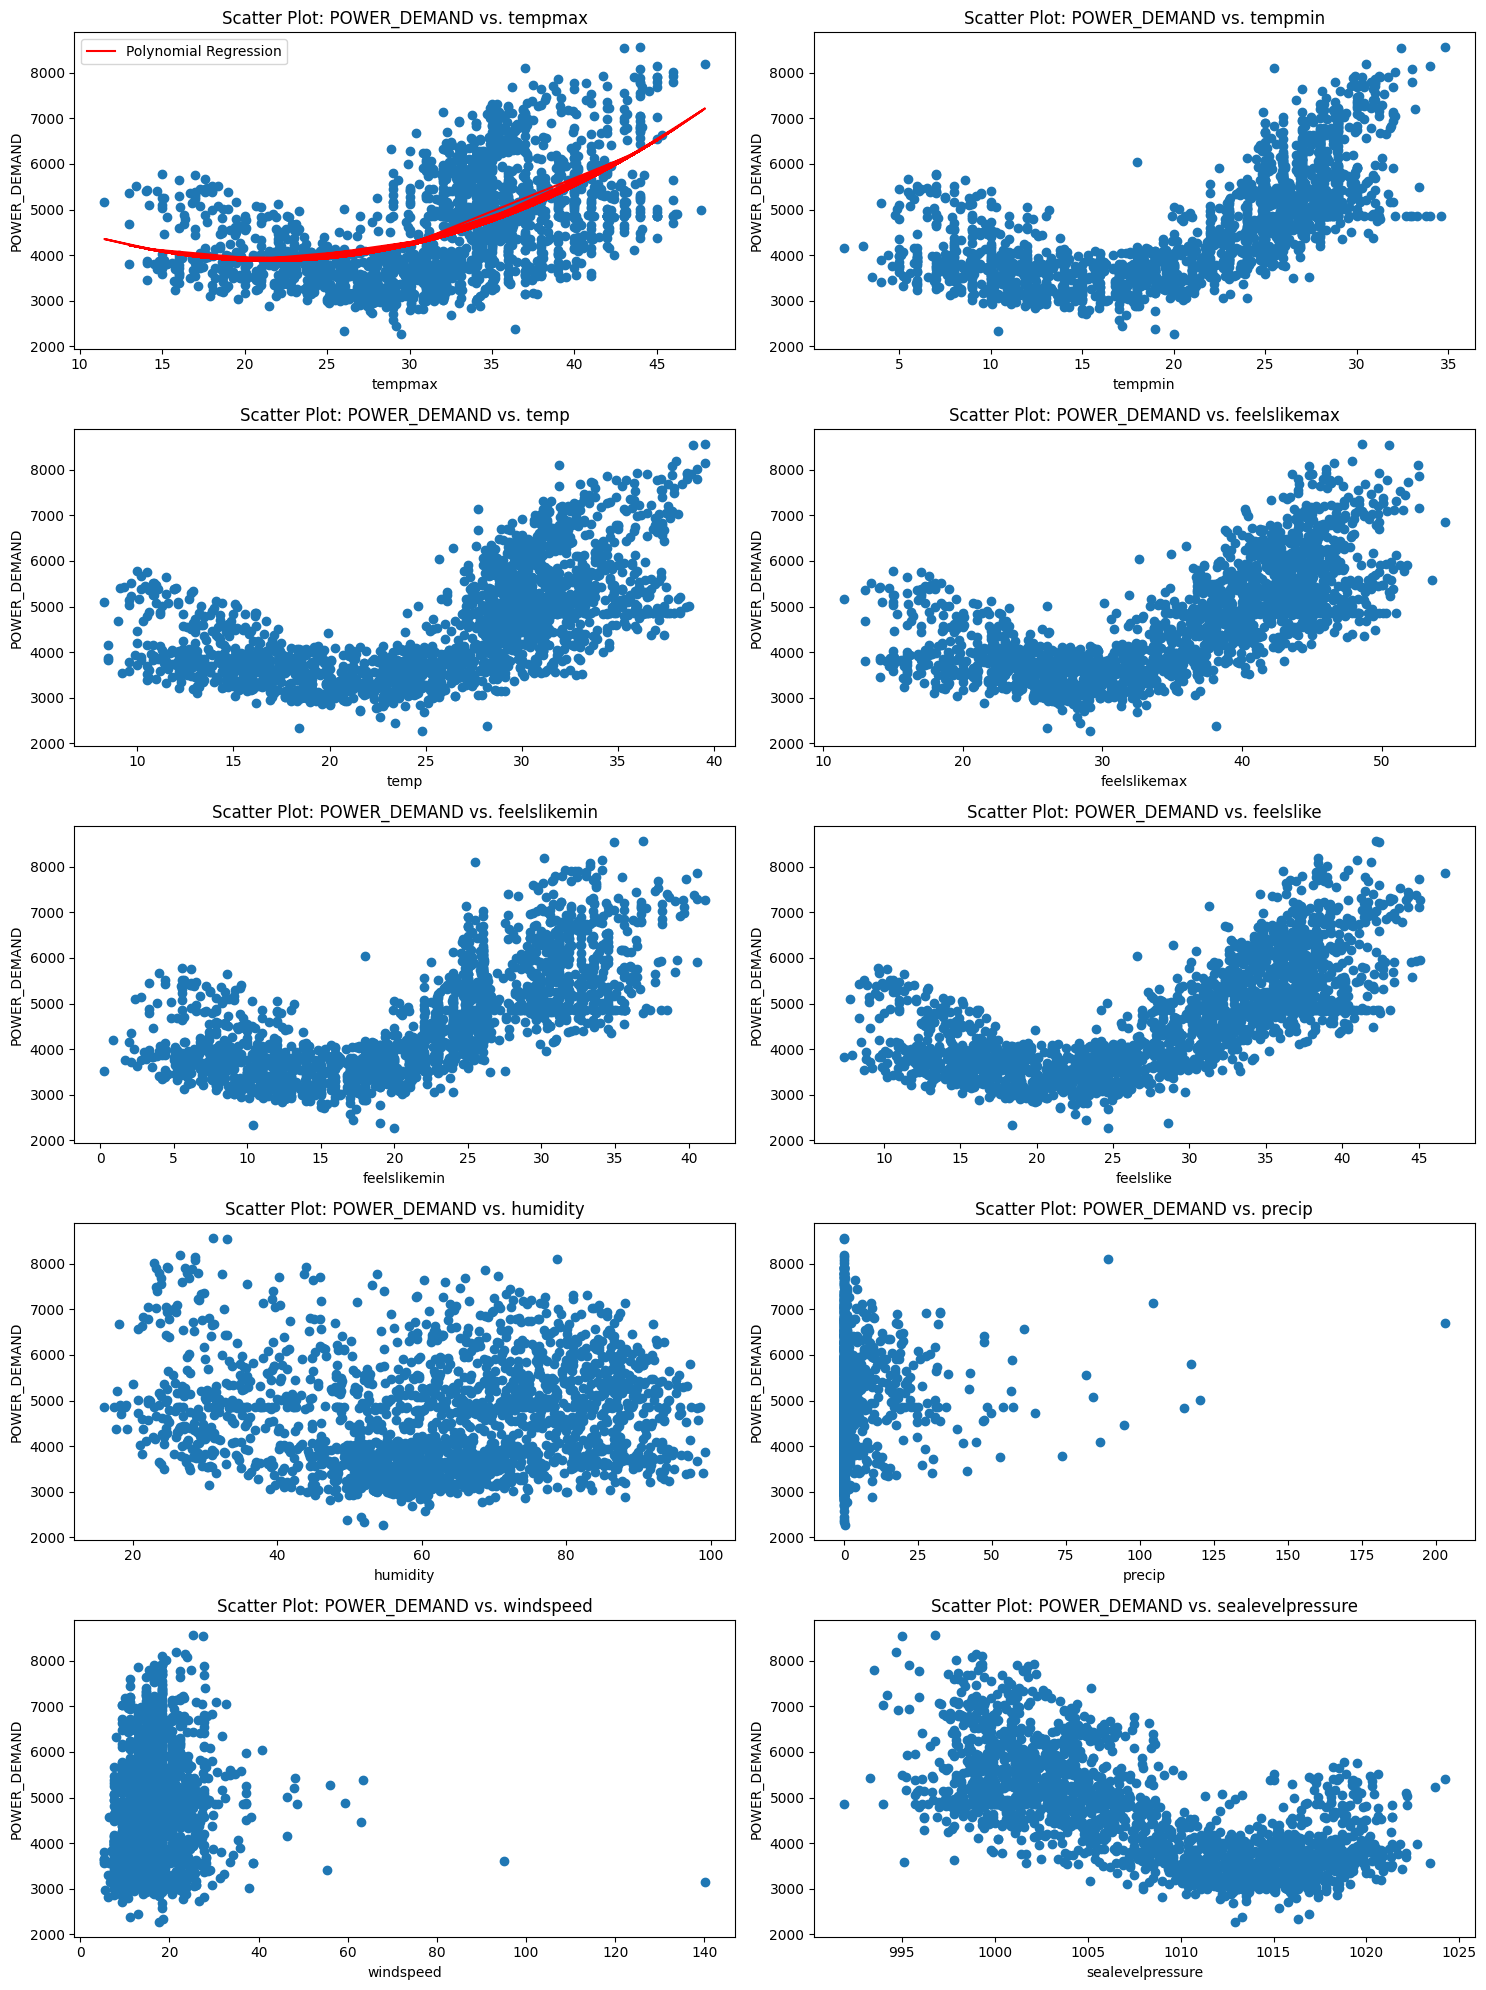

In [ ]:

# Step 1.3: Explore potential non-linear relationships between `POWER_DEMAND` and weather features using scatter plots and potentially polynomial regression.
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Create scatter plots for POWER_DEMAND against weather features
weather_features = ['tempmax', 'tempmin', 'temp', 'feelslikemax', 'feelslikemin', 'feelslike', 'humidity', 'precip', 'windspeed', 'sealevelpressure']

plt.figure(figsize=(15, 20))
for i, feature in enumerate(weather_features):
    plt.subplot(5, 2, i+1)
    plt.scatter(df1[feature], df1['POWER_DEMAND'])
    plt.xlabel(feature)
    plt.ylabel('POWER_DEMAND')
    plt.title(f'Scatter Plot: POWER_DEMAND vs. {feature}')

    # Optional: Polynomial Regression (if non-linearity is observed)
    # Example for 'tempmax' - adapt for other features if needed
    if feature == 'tempmax':
        X = df1[feature].values.reshape(-1, 1)  # Reshape using .values
        y = df1['POWER_DEMAND']
        poly = PolynomialFeatures(degree=2)  # You can change the degree
        X_poly = poly.fit_transform(X)
        poly_reg = LinearRegression()
        poly_reg.fit(X_poly, y)
        plt.plot(X, poly_reg.predict(X_poly), color='red', label='Polynomial Regression')
        plt.legend()

plt.tight_layout()
plt.savefig('scatter_plots_with_polynomial_fit.png')
img = 'scatter_plots_with_polynomial_fit.png'



In [ ]:
df1

,DATE,POWER_DEMAND,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,humidity,precip,precipprob,precipcover,windspeed,sealevelpressure,conditions,is_holiday,is_weekend,rain
0,2013-04-14,3153.0,37.7,23.1,28.7,35.4,23.1,28.1,39.7,2.0,100,4.17,22.3,1008.3,"Rain, Partially cloudy",0,1,1
1,2013-04-15,3180.0,37.5,21.1,28.6,35.3,21.1,28.0,41.7,0.0,0,0.00,17.6,1005.1,Clear,0,0,0
2,2013-04-16,3558.0,40.1,21.9,31.7,37.5,21.9,30.4,30.7,0.0,0,0.00,27.7,1001.7,Partially cloudy,0,0,0
3,2013-04-17,3646.0,36.4,21.0,29.9,34.0,21.0,28.5,27.4,0.0,0,0.00,22.3,1002.5,Clear,0,0,0
4,2013-04-18,3658.0,37.5,21.7,30.6,35.2,21.7,29.2,23.7,0.0,0,0.00,12.4,1003.4,Clear,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2054,2024-09-14,4683.0,31.0,23.0,26.5,37.6,23.0,29.1,87.5,1.0,100,8.33,16.6,1003.5,"Rain, Partially cloudy",0,1,1
2055,2024-09-15,4630.0,32.0,25.0,28.0,36.7,25.0,31.2,81.8,0.2,100,4.17,20.5,1004.3,"Rain, Partially cloudy",0,1,1
2056,2024-09-16,5000.0,32.0,26.0,28.8,37.8,26.0,32.2,77.8,0.0,0,0.00,20.5,1005.8,Partially cloudy,0,0,0
2057,2024-09-17,5490.0,33.0,26.0,29.0,38.0,26.0,33.0,78.1,0.0,0,0.00,13.0,1007.3,Partially cloudy,0,0,0


Correlation between Precipitation and Power Demand (Rain Days): 0.053597612525915765


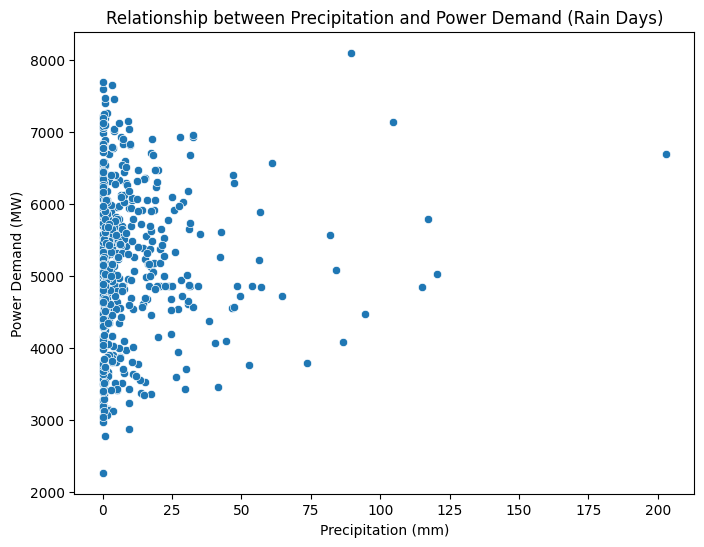

In [ ]:

# Step 1.4.1: Analyze the relationship between 'precip' and 'POWER_DEMAND' for days with rain (rain=1).
import matplotlib.pyplot as plt
import seaborn as sns

# Filter the dataframe for days with rain (rain=1)
df_rain = df1[df1['rain'] == 1]

# Create a scatter plot of 'POWER_DEMAND' against 'precip' for the filtered data
plt.figure(figsize=(8, 6))
sns.scatterplot(x='precip', y='POWER_DEMAND', data=df_rain)
plt.title("Relationship between Precipitation and Power Demand (Rain Days)")
plt.xlabel("Precipitation (mm)")
plt.ylabel("Power Demand (MW)")
plt.savefig('precip_power_demand_rain.png')
img = 'precip_power_demand_rain.png'


# Calculate the correlation coefficient between 'precip' and 'POWER_DEMAND' for the filtered data
correlation = df_rain['precip'].corr(df_rain['POWER_DEMAND'])
print(f"Correlation between Precipitation and Power Demand (Rain Days): {correlation}")


Correlation between POWER_DEMAND and precipcover: 0.18452916322962865
Correlation between POWER_DEMAND and precipprob: 0.2377901674217609


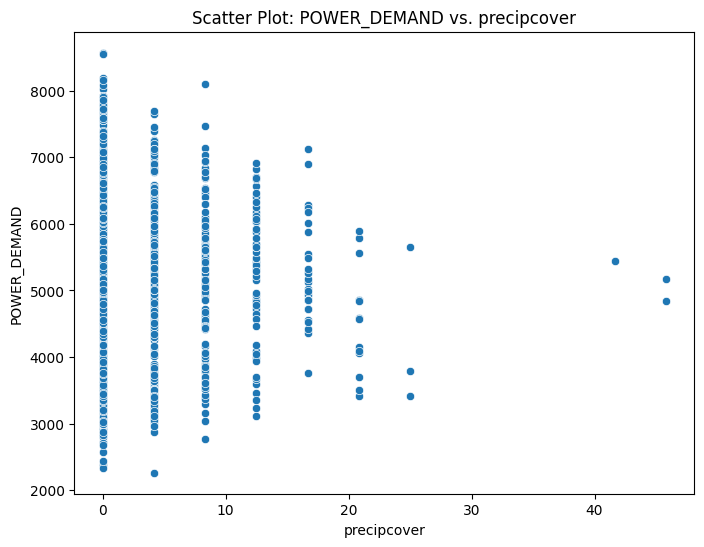

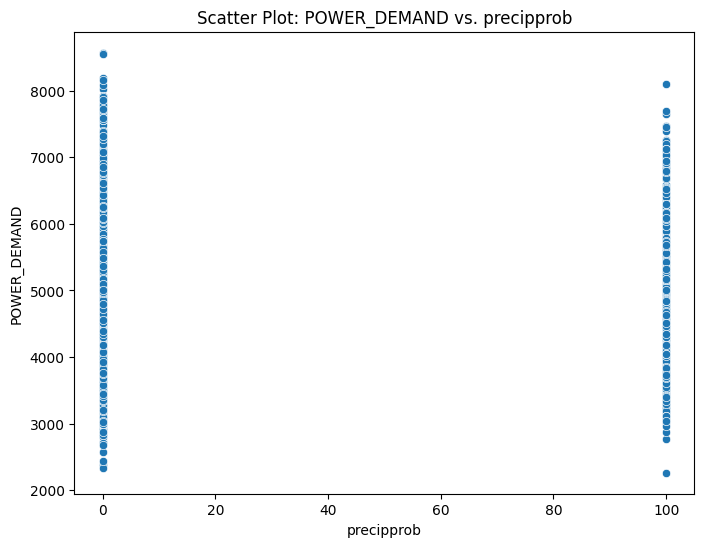

In [ ]:
# Step 1.4.2: Explore the relationship between 'precipcover', 'precipprob', and 'POWER_DEMAND'.
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot: POWER_DEMAND vs. precipcover
plt.figure(figsize=(8, 6))
sns.scatterplot(x='precipcover', y='POWER_DEMAND', data=df1)
plt.title('Scatter Plot: POWER_DEMAND vs. precipcover')
plt.xlabel('precipcover')
plt.ylabel('POWER_DEMAND')
plt.savefig('scatter_precipcover.png')

# Scatter plot: POWER_DEMAND vs. precipprob
plt.figure(figsize=(8, 6))
sns.scatterplot(x='precipprob', y='POWER_DEMAND', data=df1)
plt.title('Scatter Plot: POWER_DEMAND vs. precipprob')
plt.xlabel('precipprob')
plt.ylabel('POWER_DEMAND')
plt.savefig('scatter_precipprob.png')

# Calculate correlation coefficients
correlation_precipcover = df1['precipcover'].corr(df1['POWER_DEMAND'])
correlation_precipprob = df1['precipprob'].corr(df1['POWER_DEMAND'])

print(f"Correlation between POWER_DEMAND and precipcover: {correlation_precipcover}")
print(f"Correlation between POWER_DEMAND and precipprob: {correlation_precipprob}")

img = 'scatter_precipcover.png'  # Assuming you want to analyze precipcover first


In [ ]:
# Step 1.5: Convert the 'DATE' column to a datetime object and extract features like month, day of the week, and day of the year.
import pandas as pd

# Convert 'DATE' column to datetime
df1['DATE'] = pd.to_datetime(df1['DATE'])

# Extract datetime features
df1['month'] = df1['DATE'].dt.month
df1['dayofweek'] = df1['DATE'].dt.dayofweek
df1['dayofyear'] = df1['DATE'].dt.dayofyear


# rolling average  of window 3,7 with parameter mean().shift(1)  took onley past value not current or future value so the model will be abel to learn prediction value based on the forcasted weather and previous days power_coonsumption trends


In [ ]:
# Step 2.1: Engineer new features based on interactions and lagged features
import pandas as pd

# Interaction Features (Temperature and Humidity)
temp_features = ['tempmax', 'tempmin', 'temp', 'feelslikemax', 'feelslikemin', 'feelslike']
for feature in temp_features:
    df1[f'{feature}_humidity'] = df1[feature] * df1['humidity']

# Lagged Features (3-day and 7-day rolling averages)
for feature in temp_features + ['humidity', 'POWER_DEMAND']:
    # Rolling averages calculated based only on past data, no centering
    df1[f'{feature}_rolling_3day'] = df1[feature].rolling(window=3).mean().shift(1)
    df1[f'{feature}_rolling_7day'] = df1[feature].rolling(window=7).mean().shift(1)




In [ ]:
df1

,DATE,POWER_DEMAND,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,humidity,precip,...,feelslikemax_rolling_3day,feelslikemax_rolling_7day,feelslikemin_rolling_3day,feelslikemin_rolling_7day,feelslike_rolling_3day,feelslike_rolling_7day,humidity_rolling_3day,humidity_rolling_7day,POWER_DEMAND_rolling_3day,POWER_DEMAND_rolling_7day
0,2013-04-14,3153.0,37.7,23.1,28.7,35.4,23.1,28.1,39.7,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2013-04-15,3180.0,37.5,21.1,28.6,35.3,21.1,28.0,41.7,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2013-04-16,3558.0,40.1,21.9,31.7,37.5,21.9,30.4,30.7,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2013-04-17,3646.0,36.4,21.0,29.9,34.0,21.0,28.5,27.4,0.0,...,36.066667,NaN,22.033333,NaN,28.833333,NaN,37.366667,NaN,3297.000000,NaN
4,2013-04-18,3658.0,37.5,21.7,30.6,35.2,21.7,29.2,23.7,0.0,...,35.600000,NaN,21.333333,NaN,28.966667,NaN,33.266667,NaN,3461.333333,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2054,2024-09-14,4683.0,31.0,23.0,26.5,37.6,23.0,29.1,87.5,1.0,...,36.233333,39.928571,24.333333,25.142857,28.466667,30.714286,93.633333,91.828571,5282.000000,5463.571429
2055,2024-09-15,4630.0,32.0,25.0,28.0,36.7,25.0,31.2,81.8,0.2,...,35.133333,39.157143,23.333333,24.714286,27.100000,30.571429,93.800000,91.657143,4948.666667,5357.000000
2056,2024-09-16,5000.0,32.0,26.0,28.8,37.8,26.0,32.2,77.8,0.0,...,35.100000,39.171429,23.666667,24.571429,28.166667,30.528571,89.266667,89.742857,4720.333333,5282.000000
2057,2024-09-17,5490.0,33.0,26.0,29.0,38.0,26.0,33.0,78.1,0.0,...,37.366667,38.042857,24.666667,24.571429,30.833333,30.071429,82.366667,88.014286,4771.000000,5178.857143


In [ ]:

# Step 2.2: Consider creating features related to temperature ranges
df1['temp_range'] = df1['tempmax'] - df1['tempmin']


In [ ]:
# Step 2.3: Explore creating combined temperature-humidity variables (e.g., heat index or discomfort index).
import pandas as pd

# Function to calculate Heat Index (Steadman's formula)
def calculate_heat_index(temp, humidity):
    """Calculates the heat index based on temperature and humidity."""
    c1 = -42.379
    c2 = 2.04901523
    c3 = 10.14333127
    c4 = -0.22475541
    c5 = -6.83783 * 10**-3
    c6 = -5.481717 * 10**-2
    c7 = 1.22874 * 10**-3
    c8 = 8.5282 * 10**-4
    c9 = -1.99 * 10**-6

    T = temp  # Temperature in Celsius
    RH = humidity  # Relative humidity in percentage

    heat_index = c1 + c2*T + c3*RH + c4*T*RH + c5*T**2 + c6*RH**2 + c7*T**2*RH + c8*T*RH**2 + c9*T**2*RH**2
    return heat_index

# Calculate Heat Index and add it as a new feature
df1['heat_index'] = df1.apply(lambda row: calculate_heat_index(row['temp'], row['humidity']), axis=1)


Selected Features based on Correlation (threshold > 0.2): ['POWER_DEMAND', 'tempmax', 'tempmin', 'temp', 'feelslikemax', 'feelslikemin', 'feelslike', 'precipprob', 'sealevelpressure', 'rain', 'tempmax_humidity', 'tempmin_humidity', 'temp_humidity', 'feelslikemax_humidity', 'feelslikemin_humidity', 'feelslike_humidity', 'tempmax_rolling_3day', 'tempmax_rolling_7day', 'tempmin_rolling_3day', 'tempmin_rolling_7day', 'temp_rolling_3day', 'temp_rolling_7day', 'feelslikemax_rolling_3day', 'feelslikemax_rolling_7day', 'feelslikemin_rolling_3day', 'feelslikemin_rolling_7day', 'feelslike_rolling_3day', 'feelslike_rolling_7day', 'POWER_DEMAND_rolling_3day', 'POWER_DEMAND_rolling_7day', 'temp_range', 'heat_index']


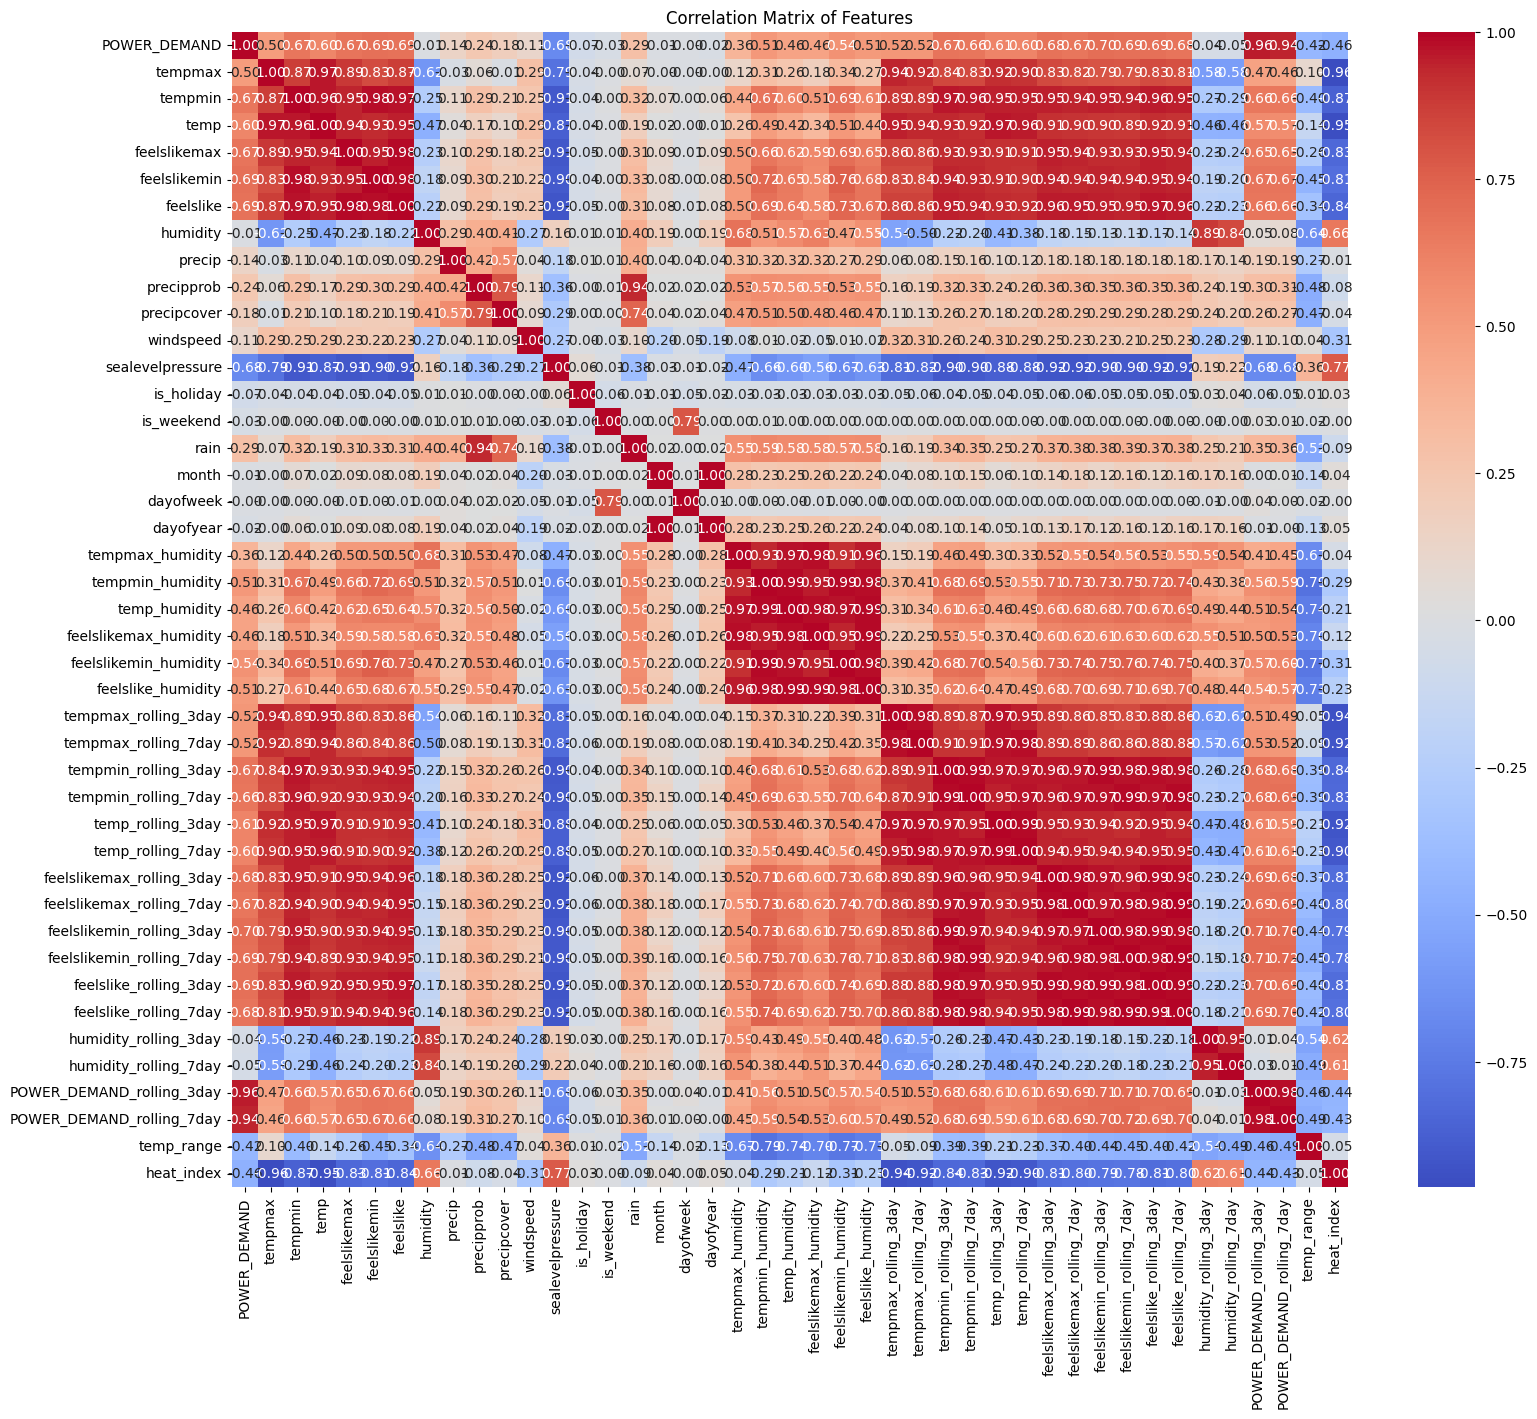

In [ ]:
# Step 2.4: Analyze and select the most relevant features from the engineered features.
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
correlation_matrix = df1.select_dtypes(include=['number']).corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(18, 15))  # Adjust figure size as needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Features')
plt.savefig('correlation_matrix.png')
img = 'correlation_matrix.png'

# Select relevant features based on correlation (example threshold)
correlation_threshold = 0.2
relevant_features = correlation_matrix[abs(correlation_matrix['POWER_DEMAND']) > correlation_threshold]['POWER_DEMAND'].index.tolist()

print(f"Selected Features based on Correlation (threshold > {correlation_threshold}): {relevant_features}")


In [ ]:
print(df1)

           DATE  POWER_DEMAND  tempmax  tempmin  temp  feelslikemax  \
0    2013-04-14        3153.0     37.7     23.1  28.7          35.4   
1    2013-04-15        3180.0     37.5     21.1  28.6          35.3   
2    2013-04-16        3558.0     40.1     21.9  31.7          37.5   
3    2013-04-17        3646.0     36.4     21.0  29.9          34.0   
4    2013-04-18        3658.0     37.5     21.7  30.6          35.2   
...         ...           ...      ...      ...   ...           ...   
2054 2024-09-14        4683.0     31.0     23.0  26.5          37.6   
2055 2024-09-15        4630.0     32.0     25.0  28.0          36.7   
2056 2024-09-16        5000.0     32.0     26.0  28.8          37.8   
2057 2024-09-17        5490.0     33.0     26.0  29.0          38.0   
2058 2024-09-18        5170.0     29.0     23.0  25.8          33.5   

      feelslikemin  feelslike  humidity  precip  ...  \
0             23.1       28.1      39.7     2.0  ...   
1             21.1       28.0      

In [ ]:

# Step 3.2: Train a baseline linear regression model to establish a performance benchmark.
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer

# Features selected from previous analysis (adjust based on LLM3's recommendations)
features = ['tempmax', 'tempmin', 'feelslikemax', 'feelslikemin',
            'humidity', 'windspeed', 'heat_index', 'POWER_DEMAND_rolling_3day',
            'POWER_DEMAND_rolling_7day', 'temp_range']

# Separate features (X) and target variable (y)
X = df1[features]
y = df1['POWER_DEMAND']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  # You can adjust test_size and random_state

# Impute missing values in the training and testing sets
imputer = SimpleImputer(strategy='mean') # You can choose a different strategy like 'median'
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Create and train the Linear Regression model
model_lr = LinearRegression()
model_lr.fit(X_train_imputed, y_train)

LinearRegression()

In [ ]:
# Step 3.3: Train a Random Forest model.
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import SimpleImputer

# Features selected from previous analysis (adjust based on LLM3's recommendations)
features = ['tempmax', 'tempmin', 'feelslikemax', 'feelslikemin',
            'humidity', 'windspeed', 'heat_index', 'POWER_DEMAND_rolling_3day',
            'POWER_DEMAND_rolling_7day', 'temp_range']

# Separate features (X) and target variable (y)
X = df1[features]
y = df1['POWER_DEMAND']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Impute missing values in the training and testing sets
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Create and train the Random Forest model
model_rf = RandomForestRegressor(n_estimators=100, random_state=42) # You can adjust hyperparameters later
model_rf.fit(X_train_imputed, y_train)



RandomForestRegressor(random_state=42)

In [ ]:
# Step 3.4: Train an XGBoost model.
import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.impute import SimpleImputer

# Features selected from previous analysis (adjust based on LLM3's recommendations)
features = ['tempmax', 'tempmin', 'feelslikemax', 'feelslikemin',
            'humidity', 'windspeed', 'heat_index', 'POWER_DEMAND_rolling_3day',
            'POWER_DEMAND_rolling_7day', 'temp_range']

# Separate features (X) and target variable (y)
X = df1[features]
y = df1['POWER_DEMAND']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Impute missing values in the training and testing sets
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Create and train the XGBoost model
model_xgb = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)  # You can adjust hyperparameters later
model_xgb.fit(X_train_imputed, y_train)



XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [ ]:
# Step 4.1: Evaluate model performance using MSE, RMSE, and R-squared on the testing set.
from sklearn.metrics import mean_squared_error, r2_score

# Predictions on the testing set
y_pred_lr = model_lr.predict(X_test_imputed)
y_pred_rf = model_rf.predict(X_test_imputed)
y_pred_xgb = model_xgb.predict(X_test_imputed)

# Calculate evaluation metrics for each model
# Linear Regression
mse_lr = mean_squared_error(y_test, y_pred_lr)
rmse_lr = mse_lr**0.5
r2_lr = r2_score(y_test, y_pred_lr)

# Random Forest
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = mse_rf**0.5
r2_rf = r2_score(y_test, y_pred_rf)

# XGBoost
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
rmse_xgb = mse_xgb**0.5
r2_xgb = r2_score(y_test, y_pred_xgb)

# Print the evaluation metrics for each model
print("Linear Regression:")
print(f"  MSE: {mse_lr}")
print(f"  RMSE: {rmse_lr}")
print(f"  R-squared: {r2_lr}")

print("\nRandom Forest:")
print(f"  MSE: {mse_rf}")
print(f"  RMSE: {rmse_rf}")
print(f"  R-squared: {r2_rf}")

print("\nXGBoost:")
print(f"  MSE: {mse_xgb}")
print(f"  RMSE: {rmse_xgb}")
print(f"  R-squared: {r2_xgb}")




Linear Regression:
  MSE: 91685.2160994021
  RMSE: 302.79566724014086
  R-squared: 0.934362884099752

Random Forest:
  MSE: 82035.55889768593
  RMSE: 286.41850306445974
  R-squared: 0.9412710389265893

XGBoost:
  MSE: 83380.48838505974
  RMSE: 288.7567979893456
  R-squared: 0.9403082087518236


#so far the bast model is Randem forest  so we perform
# **Hyperparameter Tuning using GridSearchCV**

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the hyperparameters grid
param_grid = {
    'n_estimators': [100, 200, 300],           # Number of trees
    'max_depth': [None, 10, 20, 30],           # Maximum depth of each tree
    'min_samples_split': [2, 5, 10],           # Minimum samples required to split a node
    'min_samples_leaf': [1, 2, 4],             # Minimum samples required at a leaf node
    'bootstrap': [True, False]                 # Whether bootstrap samples are used when building trees
}

# Initialize the Random Forest model
rf = RandomForestRegressor(random_state=42)

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid,
                           cv=3, n_jobs=-1, verbose=2, scoring='neg_mean_squared_error')

# Train using the imputed training data
grid_search.fit(X_train_imputed, y_train)

# Get the best model
RF_best = grid_search.best_estimator_

# Display the best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)


Fitting 3 folds for each of 216 candidates, totalling 648 fits
Best Hyperparameters: {'bootstrap': True, 'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 100}


In [ ]:
# Predict on the test set using RF_best
y_pred = RF_best.predict(X_test_imputed)

# Evaluate the model performance
from sklearn.metrics import mean_squared_error, r2_score

# Calculate mean squared error and R^2 score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")


In [ ]:
import pandas as pd

# Create a DataFrame to compare actual and predicted values   for best performed linear regression model
comparison_df = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred_rf
})

# Display the table
print(comparison_df.head(10))  # Display the first few rows


      Actual    Predicted
1298  5808.0  5461.800000
591   4145.0  4039.350000
1318  6482.0  6502.855000
1067  3173.0  3318.990000
29    5173.0  5071.010000
1058  3294.5  3407.816667
712   4422.0  4589.360000
453   4810.0  4813.140000
1646  6835.0  6404.390000
757   3762.0  4410.720000


# **visulization  of model performance**

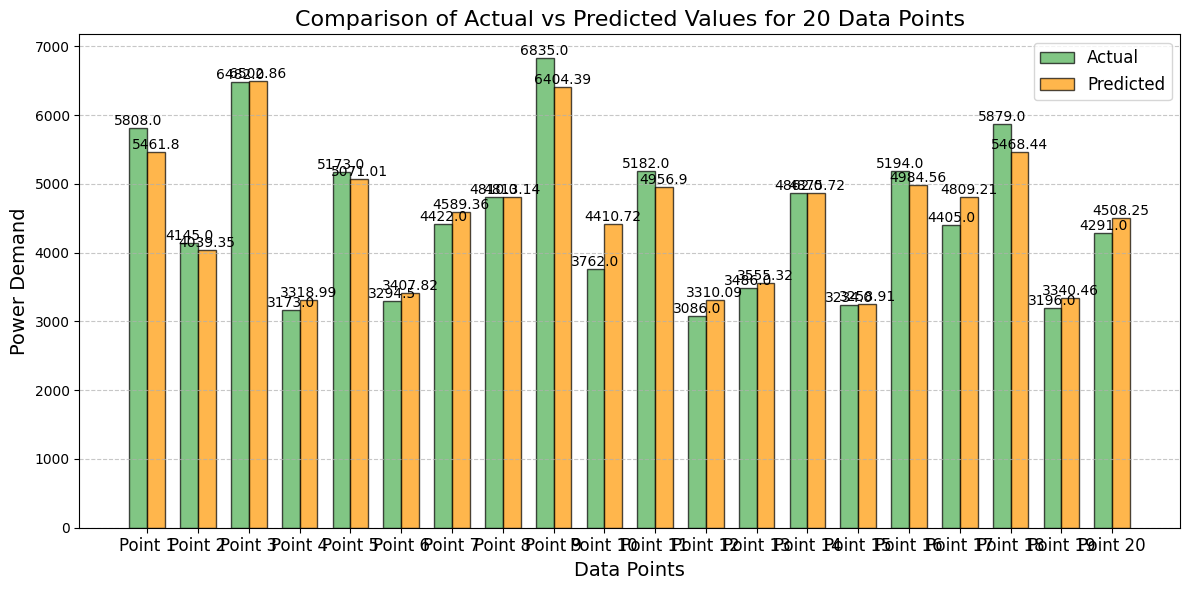

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Define n (number of data points to display)
n = 20
comparison_df_n = comparison_df.head(n)

# Set the figure size
plt.figure(figsize=(12, 6))

# Set positions for the bars
x = np.arange(len(comparison_df_n))  # the label locations
width = 0.35  # the width of the bars

# Use a color palette
actual_color = '#4CAF50'  # Green
predicted_color = '#FF9800'  # Orange

# Plot actual values
bars_actual = plt.bar(x - width/2, comparison_df_n['Actual'], width, label='Actual', color=actual_color, edgecolor='black', alpha=0.7)

# Plot predicted values
bars_predicted = plt.bar(x + width/2, comparison_df_n['Predicted'], width, label='Predicted', color=predicted_color, edgecolor='black', alpha=0.7)

# Add labels, title, and ticks
plt.xlabel('Data Points', fontsize=14)
plt.ylabel('Power Demand', fontsize=14)
plt.title(f'Comparison of Actual vs Predicted Values for {n} Data Points', fontsize=16)

# Set the x-tick positions and labels
plt.xticks(x, [f'Point {i+1}' for i in range(n)], fontsize=12)

# Add a legend to differentiate actual and predicted values
plt.legend(fontsize=12)

# Add grid lines for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add data labels on top of the bars
for bar in bars_actual:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom', fontsize=10, color='black')

for bar in bars_predicted:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom', fontsize=10, color='black')

# Show the plot
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()


In [ ]:
comparison_df

,Actual,Predicted
1298,5808.0,5461.800
591,4145.0,4039.350
1318,6482.0,6502.855
1067,3173.0,3318.990
29,5173.0,5071.010
...,...,...
1033,3973.0,3947.800
674,5362.0,5162.400
1771,3837.0,3801.950
322,3312.0,3652.340


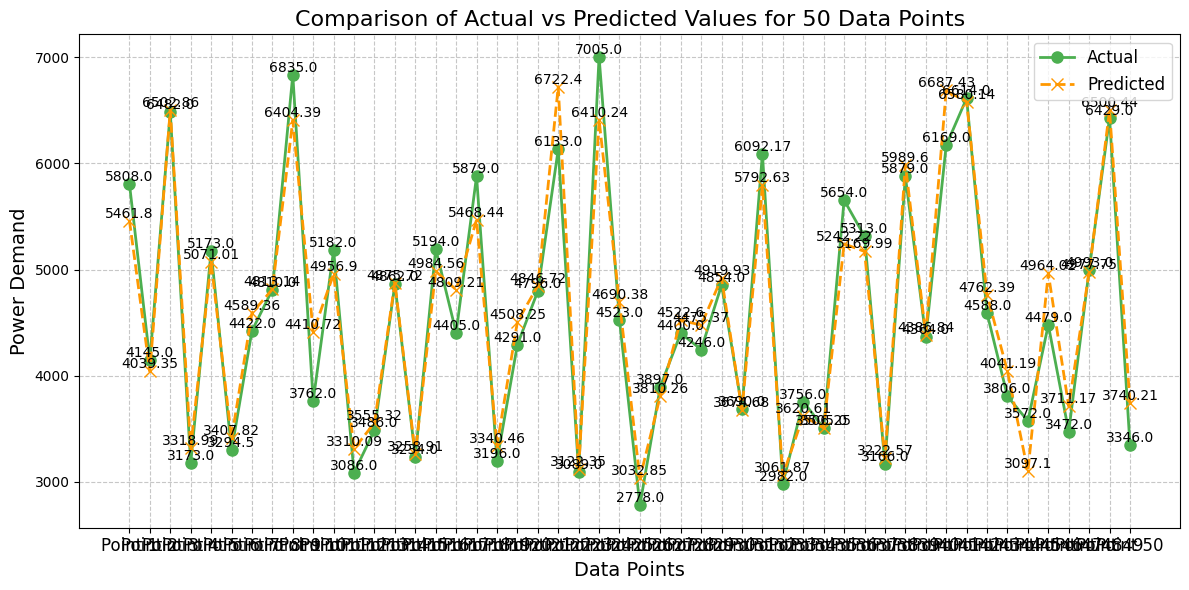

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Define n (number of data points to display)
n = 50  # You can change this value to display a different number of data points

# Select the first n data points from the comparison DataFrame
comparison_df_n = comparison_df.head(n)

# Set the figure size for better readability
plt.figure(figsize=(12, 6))

# Set the index for x-axis
x = np.arange(len(comparison_df_n))

# Plot actual values
plt.plot(x, comparison_df_n['Actual'], label='Actual', marker='o', linestyle='-', color='#4CAF50', markersize=8, linewidth=2)

# Plot predicted values
plt.plot(x, comparison_df_n['Predicted'], label='Predicted', marker='x', linestyle='--', color='#FF9800', markersize=8, linewidth=2)

# Add labels, title, and ticks
plt.xlabel('Data Points', fontsize=14)
plt.ylabel('Power Demand', fontsize=14)
plt.title(f'Comparison of Actual vs Predicted Values for {n} Data Points', fontsize=16)

# Set the x-tick positions and labels
plt.xticks(x, [f'Point {i+1}' for i in range(n)], fontsize=12)

# Add a legend to differentiate actual and predicted values
plt.legend(fontsize=12)

# Add grid lines for better readability
plt.grid(axis='both', linestyle='--', alpha=0.7)

# Add data labels on the points
for i in range(n):
    plt.text(x[i], comparison_df_n['Actual'].iloc[i], round(comparison_df_n['Actual'].iloc[i], 2),
             ha='center', va='bottom', fontsize=10, color='black')
    plt.text(x[i], comparison_df_n['Predicted'].iloc[i], round(comparison_df_n['Predicted'].iloc[i], 2),
             ha='center', va='bottom', fontsize=10, color='black')

# Show the plot
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()


Linear Regression:
  MSE: 91010.04713080906
  RMSE: 301.67871507749607
  R-squared: 0.9348462351320028
Linear Regression - Actual vs Predicted:
      Actual    Predicted
1298  5808.0  5396.230736
591   4145.0  3933.422746
1318  6482.0  6417.880967
1067  3173.0  3417.671884
29    5173.0  5057.335931


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 6s 45ms/step - loss: 22447076.0000 - val_loss: 16539564.0000
Epoch 2/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 8982554.0000 - val_loss: 1373973.8750
Epoch 3/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1131080.6250 - val_loss: 858823.3750
Epoch 4/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 844959.7500 - val_loss: 696476.4375
Epoch 5/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 706637.3125 - val_loss: 544808.8125
Epoch 6/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 571387.3125 - val_loss: 447438.7500
Epoch 7/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 459802.5000 - val_loss: 329978.4062
Epoch 8/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 386575.4375 - val_loss: 253895.2969
Epoch 9/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 287618.4375 - val_loss: 194485.3281
Epoch 10/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 250414.0312 - val_loss: 172965.0938
Epoch 11/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 0

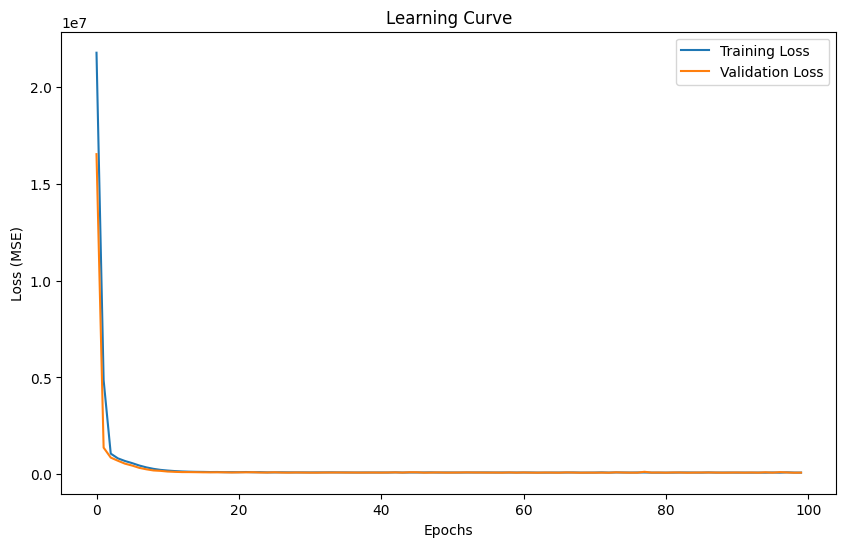

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Assuming df1 is your DataFrame with the relevant data

# Step 1: Select Features and Target
features = ['tempmax', 'tempmin', 'feelslikemax', 'feelslikemin',
            'humidity', 'windspeed', 'POWER_DEMAND_rolling_3day',
            'POWER_DEMAND_rolling_7day', 'temp_range']

X = df1[features]
y = df1['POWER_DEMAND']

# Step 2: Split Data into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Impute Missing Values
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Step 4: Train a Baseline Linear Regression Model
model_lr = LinearRegression()
model_lr.fit(X_train_imputed, y_train)

# Step 5: Evaluate the Linear Regression Model
y_pred_lr = model_lr.predict(X_test_imputed)

mse_lr = mean_squared_error(y_test, y_pred_lr)
rmse_lr = mse_lr**0.5
r2_lr = r2_score(y_test, y_pred_lr)

print("Linear Regression:")
print(f"  MSE: {mse_lr}")
print(f"  RMSE: {rmse_lr}")
print(f"  R-squared: {r2_lr}")

# Step 6: Create Actual vs Predicted Table for Linear Regression
comparison_df_lr = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred_lr
})

print("Linear Regression - Actual vs Predicted:")
print(comparison_df_lr.head())

# Step 7: Scale Features for Neural Network
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_imputed)
X_test_scaled = scaler.transform(X_test_imputed)

# Step 8: Define the Neural Network Model without Dropout
model_nn = Sequential([
    Dense(328, input_dim=X_train_scaled.shape[1], activation='relu'),
    Dense(224, activation='relu'),

    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1, activation='linear')
])

# Step 9: Compile and Train the Neural Network Model
model_nn.compile(optimizer='adam', loss='mean_squared_error')

history = model_nn.fit(X_train_scaled, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=1)

# Step 10: Evaluate the Neural Network Model
y_pred_nn = model_nn.predict(X_test_scaled).flatten()

mse_nn = mean_squared_error(y_test, y_pred_nn)
rmse_nn = mse_nn**0.5
r2_nn = r2_score(y_test, y_pred_nn)

print("\nNeural Network:")
print(f"  MSE: {mse_nn}")
print(f"  RMSE: {rmse_nn}")
print(f"  R-squared: {r2_nn}")

# Step 11: Create Actual vs Predicted Table for Neural Network
comparison_df_nn = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred_nn
})

print("Neural Network - Actual vs Predicted:")
print(comparison_df_nn.head())

# Step 12: Plot Learning Curve for the Neural Network
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Learning Curve')
plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.show()

# Optional: Save the comparison tables to CSV files
comparison_df_lr.to_csv('actual_vs_predicted_lr.csv', index=False)
comparison_df_nn.to_csv('actual_vs_predicted_nn.csv', index=False)


In [ ]:

import joblib

# Save the model to a file
filename = 'RF_best_model.sav'
joblib.dump(RF_best, filename)



#nural network with best parameters
#hyperparameter tuning   using keras-tuner



In [ ]:
!pip install keras-tuner


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 4.7 MB/s eta 0:00:00


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import keras_tuner as kt


features = ['tempmax', 'tempmin', 'feelslikemax', 'feelslikemin',
            'humidity', 'windspeed', 'POWER_DEMAND_rolling_3day',
            'POWER_DEMAND_rolling_7day', 'temp_range']
X = df1[features]
y = df1['POWER_DEMAND']

# Step 1: Split Data into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 2: Impute Missing Values
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Step 3: Scale the Features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_imputed)
X_test_scaled = scaler.transform(X_test_imputed)

# Step 4: Define the model-building function for Keras Tuner
def build_model(hp):
    model = Sequential()
    hp_units1 = hp.Int('units1', min_value=64, max_value=512, step=32)
    hp_units2 = hp.Int('units2', min_value=64, max_value=512, step=32)
    model.add(Dense(units=hp_units1, activation='relu', input_dim=X_train_scaled.shape[1]))
    model.add(Dense(units=hp_units2, activation='relu'))
    model.add(Dense(128, activation='relu'))
    model.add(Dense(1, activation='linear'))

    hp_learning_rate = hp.Choice('learning_rate', values=[1e-4, 1e-3, 1e-2])
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=hp_learning_rate), loss='mean_squared_error')

    return model

# Step 5: Initialize Keras Tuner
tuner = kt.RandomSearch(
    build_model,
    objective='val_loss',
    max_trials=10,
    executions_per_trial=2,
    directory='my_tuning_dir',
    project_name='power_demand_nn_tuning'
)

# Step 6: Perform hyperparameter search
tuner.search(X_train_scaled, y_train, epochs=50, validation_split=0.2, batch_size=32)

# Step 7: Retrieve the best hyperparameters and model
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
best_model = tuner.hypermodel.build(best_hps)

# Step 8: Train the best model
history_best = best_model.fit(X_train_scaled, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=1)

# Step 9: Evaluate the tuned neural network on the test set
y_pred_nn_tuned = best_model.predict(X_test_scaled).flatten()

mse_nn_tuned = mean_squared_error(y_test, y_pred_nn_tuned)
rmse_nn_tuned = mse_nn_tuned**0.5
r2_nn_tuned = r2_score(y_test, y_pred_nn_tuned)

print("\nTuned Neural Network:")
print(f"  MSE: {mse_nn_tuned}")
print(f"  RMSE: {rmse_nn_tuned}")
print(f"  R-squared: {r2_nn_tuned}")

# Plot learning curve
plt.figure(figsize=(10, 6))
plt.plot(history_best.history['loss'], label='Training Loss')
plt.plot(history_best.history['val_loss'], label='Validation Loss')
plt.title('Tuned Neural Network Learning Curve')
plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.show()
